# Lab 5: PCA and CCA on SST Data

* [Exploration](#exploration)
* [Lab Work](#lab-work)

## Exploration <a class="anchor" id="exploration"></a>

The code loads SST (sea surface temperature) anomalies data from last tutorial (saved in `SST_anomalies_data.mat`) then loads the `.nc` file of gridded monthly temperature data for BC.

Period: Jan 1979 to July 2017.

All the data pre-processing is done below.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [31]:
# load SST data from .csv file and check it out; rows are months, columns are locations
dataSST = pd.read_csv('SST_anomalies_data.csv',header=None)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print('>> SST_anomalies_data.csv')
print(dataSST.head())

# these are just the known boundaries of the SST grid [lonmin, lonmax, latmin, latmax] for plotting
SST_extent = [-360+159.75, -360+260.25, -10.5 ,10.5]

# load coastline data
coasts = pd.read_csv('coastline.csv',header=None)
coastLat = coasts[0]
coastLon = coasts[1]
print('\n>> coastline.csv')
print(coasts.head())

>> SST_anomalies_data.csv
      0        1        2        3        4        5         6         7     \
0 -0.12308 -0.12084 -0.12139 -0.12105 -0.13158 -0.15349 -0.176680 -0.178460   
1 -0.17330 -0.16945 -0.17073 -0.16849 -0.17042 -0.17796 -0.187190 -0.193050   
2 -0.23927 -0.22003 -0.20046 -0.17401 -0.14145 -0.10520 -0.067116 -0.054451   
3 -0.30643 -0.29158 -0.26821 -0.23386 -0.19164 -0.14981 -0.113170 -0.102410   
4 -0.31070 -0.31951 -0.30628 -0.27171 -0.23147 -0.20701 -0.200140 -0.209410   

       8         9     ...      3905      3906      3907      3908      3909  \
0 -0.147430 -0.113170  ...  0.144570  0.091902  0.046698  0.024065  0.004118   
1 -0.185620 -0.174880  ...  0.112990  0.022551 -0.063413 -0.117790 -0.161240   
2 -0.068909 -0.090536  ...  0.098546 -0.001382 -0.107230 -0.191060 -0.261070   
3 -0.114450 -0.122130  ...  0.039214 -0.047552 -0.130820 -0.189120 -0.236900   
4 -0.228770 -0.236770  ... -0.118960 -0.149970 -0.178420 -0.200660 -0.222210   

       3910      3

In [6]:
# open netcdf file of temperature over BC
filename = 'T_monthly_Canada_1979_2017_ERA_Interim.nc'
dataERA = Dataset(filename)

lonERA = -360+dataERA.variables['longitude'][:] # in degrees E
latERA = dataERA.variables['latitude'][:]       # in degrees N
timeERA = dataERA.variables['time'][:]          # in hours since year 1900... not a great unit, but it's what ERA comes in
T = dataERA.variables['t2m']                    # in K

In [7]:
# reformat data from 3D to 2D, where rows are grid points, columns are months
T2d = np.empty((np.shape(T)[1]*np.shape(T)[2], np.shape(T)[0]))
for ii in range(np.shape(T)[0]):
    T2d[:,ii] = np.reshape(T[ii], (np.shape(T)[1]*np.shape(T)[2],))

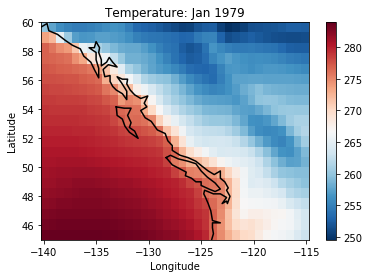

In [8]:
# plot temp over whole domain Jan 1979
lonERAmin = np.min(lonERA)
lonERAmax = np.max(lonERA)
latERAmin = np.min(latERA)
latERAmax = np.max(latERA)
T_extent = [lonERAmin, lonERAmax, latERAmin, latERAmax]
plt.imshow(np.asarray(np.squeeze(T[0,:,:])), extent=T_extent,cmap = 'RdBu_r',aspect='auto')
plt.plot(coastLon,coastLat,c='k')
plt.xlim(T_extent[:2])
plt.ylim(T_extent[2:])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature: Jan 1979')
plt.colorbar()


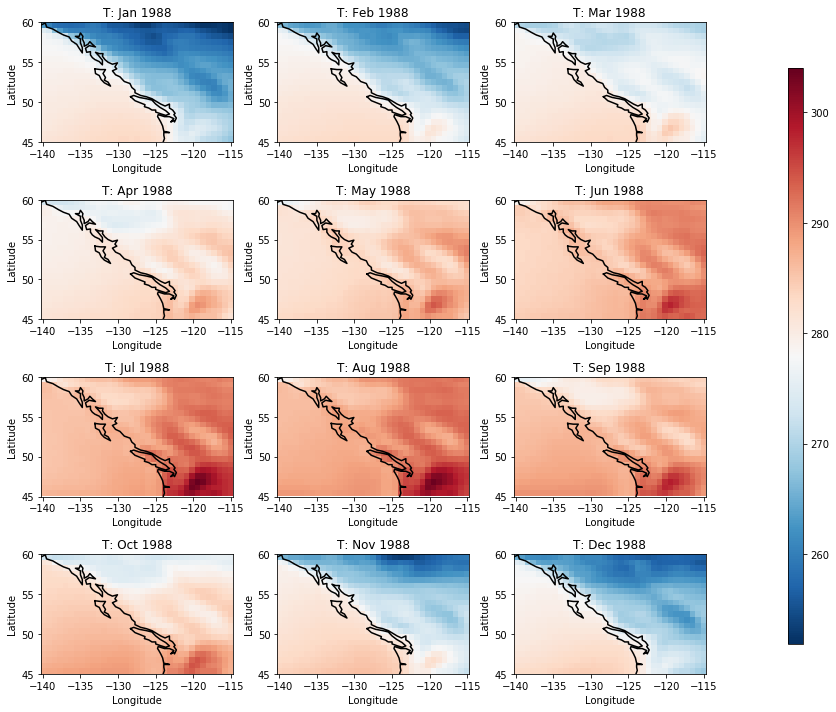

In [9]:
# plot temp for each month in 1988, since this year had a strong La Nina event
vmin = np.min([T[12*9+month,:,:] for month in range(12)])
vmax = np.max([T[12*9+month,:,:] for month in range(12)])
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
month = 0
for ax in axes.flat:
    im = ax.imshow(np.asarray(np.squeeze(T[12*9+month,:,:])), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T: ' + months[month] +' 1988')
    month+=1
 
plt.tight_layout()
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

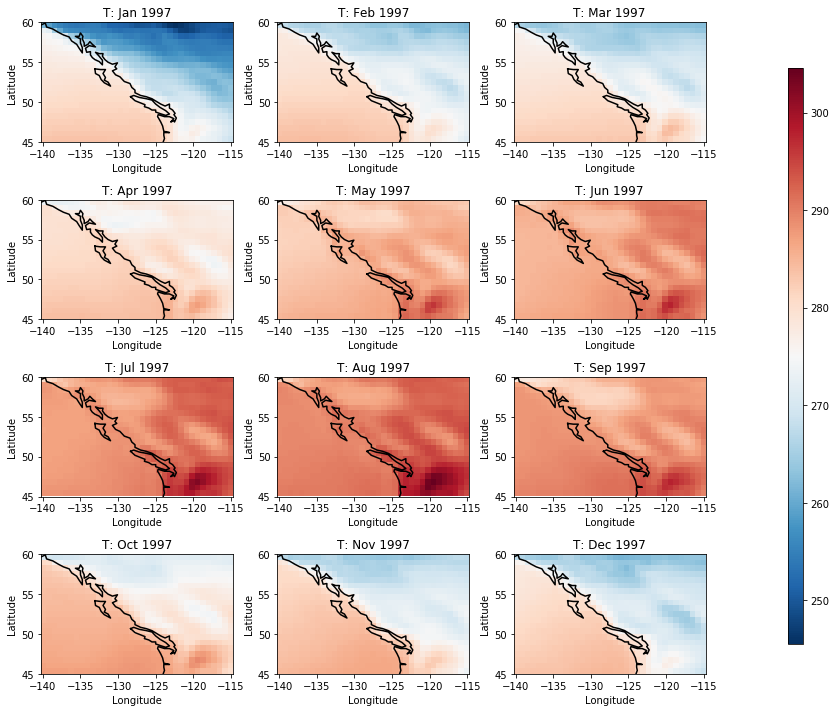

In [10]:
# plot temp for each month in 1997, since this year had a strong El Nino event
vmin = np.min([T[12*18+month,:,:] for month in range(12)])
vmax = np.max([T[12*18+month,:,:] for month in range(12)])

fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
month = 0
for ax in axes.flat:
    im = ax.imshow(np.asarray(np.squeeze(T[12*18+month,:,:])), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T: ' + months[month] +' 1997')
    month += 1

plt.tight_layout()    
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

Preprocessing: remove seasonal cycle and apply 3-month running mean -- we want smoothed anomalies!



In [11]:
# remove last 7 months from 2017, so the timeseries line up
T_cut = T[:-7]
T2d_cut = T2d[:,:-7]

# calculate seasonal signal for each grid point
nyears = 38
T2d_seasonal = np.empty((np.shape(T2d)[0],12))
for ii in range(len(T2d_cut)):
    T2d_seasonal[ii,:] = np.mean(np.reshape(T2d_cut[ii,:],(nyears,12)),axis=0)

# repeat the seasonal cycle for all years
T2d_seasonal_all = np.tile(T2d_seasonal,(1,nyears))

# remove seasonal cycle from the original data (calculate anomalies)
T2d_anomalies = T2d_cut - T2d_seasonal_all

# apply 3-month running mean on each grid point 
T2d_anomalies_smooth = np.empty_like(T2d_anomalies)
N=3 # length of moving window
for ii in range(len(T2d_anomalies)):
    x=T2d_anomalies[ii,:]
    T2d_anomalies_smooth[ii,:] = np.convolve(x, np.ones((N,))/N, mode='same')


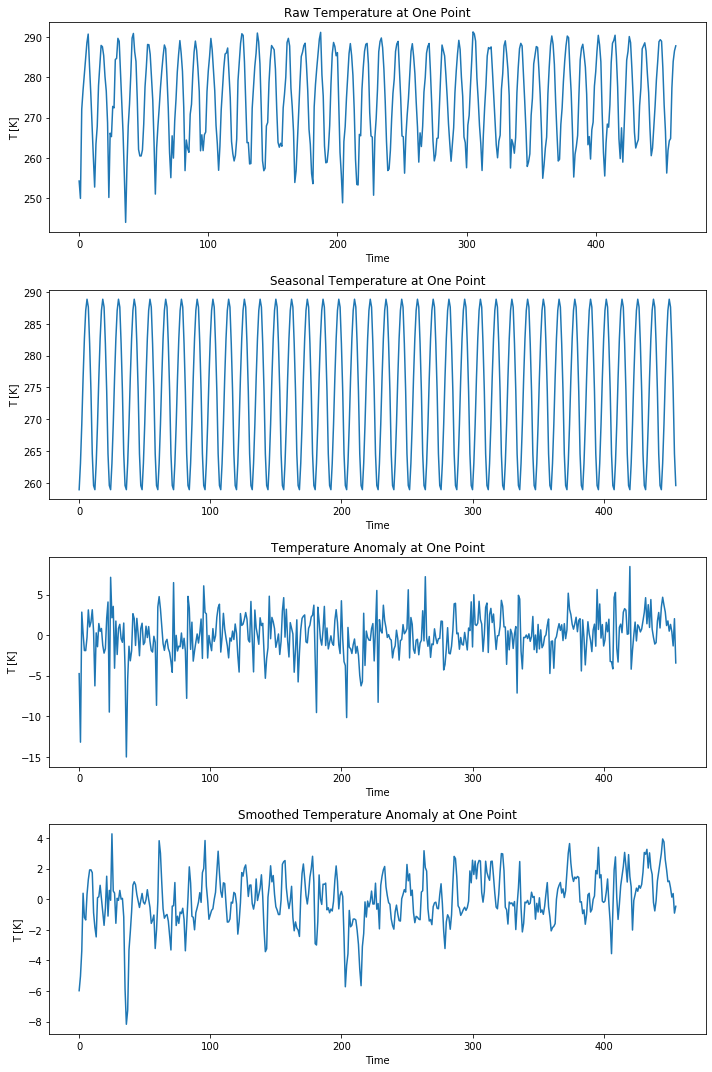

In [12]:
# let's visualize all of these great pre-processing steps!
gridIndex = 50 # arbitrary grid point to visualize the preprocessing for

plt.figure(figsize=(10,15))

plt.subplot(4,1,1)
plt.plot(T2d[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Raw Temperature at One Point')

plt.subplot(4,1,2)
plt.plot(T2d_seasonal_all[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Seasonal Temperature at One Point')

plt.subplot(4,1,3)
plt.plot(T2d_anomalies[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Temperature Anomaly at One Point')

plt.subplot(4,1,4)
plt.plot(T2d_anomalies_smooth[gridIndex,:])
plt.xlabel('Time')
plt.ylabel('T [K]')
plt.title('Smoothed Temperature Anomaly at One Point')

plt.tight_layout()
plt.show()

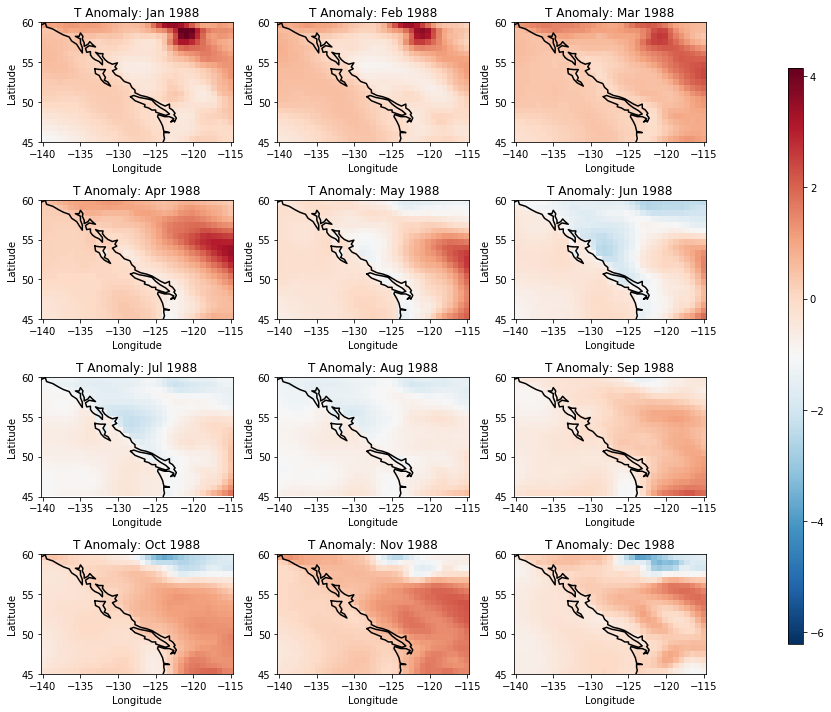

In [13]:
# plot the 3-month running mean of residuals for all grid points for all months of 1988
vmin = np.min([T2d_anomalies_smooth[12*9+month,:] for month in range(12)])
vmax = np.max([T2d_anomalies_smooth[12*9+month,:] for month in range(12)])

fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
month = 0
for ax in axes.flat:
    im = ax.imshow(np.asarray(np.reshape(T2d_anomalies_smooth[:,12*9+month],(21,35))), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T Anomaly: ' + months[month] +' 1988')
    month+=1

plt.tight_layout()   
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

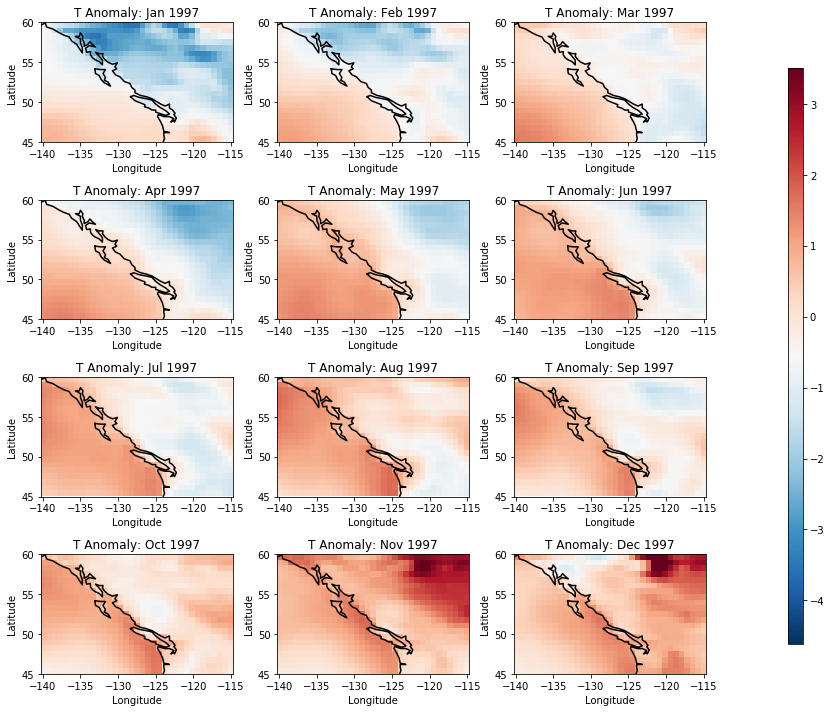

In [14]:
# plot the 3-month running mean of residuals for all grid points for all months of 1997
vmin = np.min([T2d_anomalies_smooth[12*18+month,:] for month in range(12)])
vmax = np.max([T2d_anomalies_smooth[12*18+month,:] for month in range(12)])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
month = 0
for ax in axes.flat:
    im = ax.imshow(np.asarray(np.reshape(T2d_anomalies_smooth[:,12*18+month],(21,35))), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('T Anomaly: ' + months[month] +' 1997')
    month+=1

plt.tight_layout()
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

## Lab Work <a class="anchor" id="lab-work"></a>

### Using PCA on Anomoly Data

Perform PCA on T anomaly data to find spatial modes.

In [24]:
# do PCA using built-in library
data = T2d_anomalies_smooth.T

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

In [0]:
# plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [0]:
# plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
n = 3
plt.figure(figsize=(15,5*n))
for kk in range(n):
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs[kk,:],(21,35)),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
    plt.plot(coastLon,coastLat,c='k')
    plt.xlim(T_extent[:2])
    plt.ylim(T_extent[2:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.colorbar()
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
    plt.tight_layout()

### Canonical Correspondence Analysis (CCA)

Now, do CCA to compare our data.

In [33]:
# rows are time steps -- these must be the same in both x an y data
xdata = np.asarray(dataSST[:-4])
ydata = T2d_anomalies_smooth.T
# check shape
print('Shape of xdata: ' + str(np.shape(xdata)[0]) + ' rows, ' + str(np.shape(xdata)[1]) + ' columns')
print('Shape of ydata: ' + str(np.shape(ydata)[0]) + ' rows, ' + str(np.shape(ydata)[1]) + ' columns')

Shape of xdata: 456 rows, 3915 columns
Shape of ydata: 456 rows, 735 columns


Note the shape of our `xdata` and `ydata`: they have the same number of rows (ie sample), but differing numbers of columns (features), which is important to have before performing CCA.

We want to do PCA on T (temperature) and SST datasets first so that CCA is finding modes which explain non-negligible fractions of total variance.

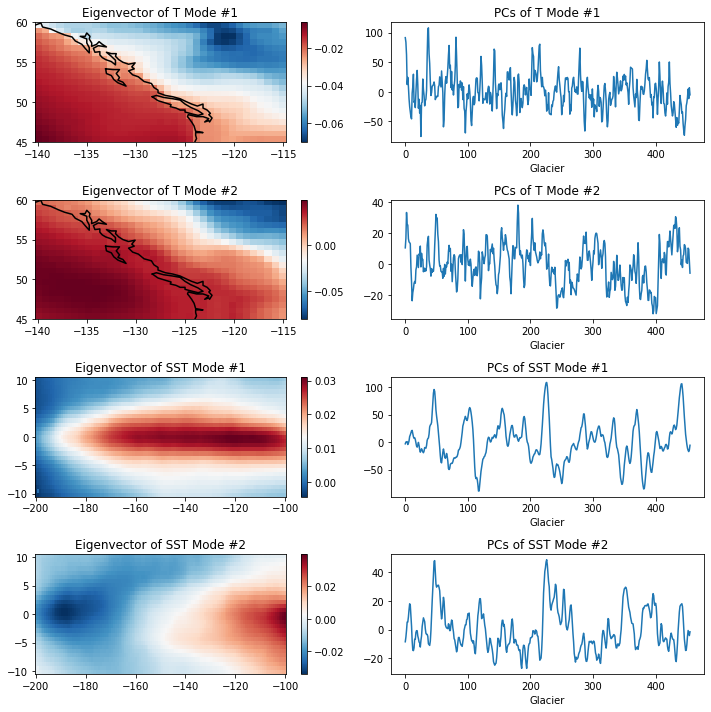

In [76]:
# process temperatures
pca_input_T = T2d_anomalies_smooth.T
n_modes_T = 2
pca_T = PCA(n_components = n_modes_T)
PCs_T = pca_T.fit_transform(pca_input_T)
eigvecs_T = pca_T.components_
fracVar_T = pca_T.explained_variance_ratio_

# process SST
pca_input_SST = np.asarray(dataSST[:-4])
n_modes_SST = 2
pca_SST = PCA(n_components = n_modes_SST)
PCs_SST = pca_SST.fit_transform(pca_input_SST)
eigvecs_SST = pca_SST.components_
fracVar_SST = pca_SST.explained_variance_ratio_

# reconstruct T and SST, using first two modes for each dataset
data_T_rec = np.empty_like(pca_input_T)
for kk in range(np.shape(pca_input_T)[0]): # for each month
    this_T_rec = np.zeros_like(pca_input_T[0,:])
    for mode in range(n_modes_T):
        this_T_rec += eigvecs_T[mode,:]*PCs_T[kk,mode]    
    data_T_rec[kk,:] = this_T_rec
data_SST_rec = np.empty_like(pca_input_SST)
for kk in range(np.shape(pca_input_SST)[0]): # for each month
    this_SST_rec = np.zeros_like(pca_input_SST[0,:])
    for mode in range(n_modes_SST):
        this_SST_rec += eigvecs_SST[mode,:]*PCs_SST[kk,mode]    
    data_SST_rec[kk,:] = this_SST_rec
    
# visualize PCA modes
n = 2
plt.figure(figsize=(10,5*n))
for kk in range(n):
    
    plt.subplot(2*n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs_T[kk,:],(21,35)),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
    plt.plot(coastLon,coastLat,c='k')
    plt.xlim(T_extent[:2])
    plt.ylim(T_extent[2:])
    plt.title('Eigenvector of T Mode #' + str(kk+1))
    plt.colorbar()

    plt.subplot(2*n,2,(kk+1)*2)
    plt.plot(PCs_T[:,kk])
    plt.title('PCs of T Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
    plt.subplot(2*n,2,kk*2+5)
    plt.imshow(np.reshape(eigvecs_SST[kk,:],(29,135)),extent=SST_extent,cmap = 'RdBu_r',aspect='auto')
    plt.title('Eigenvector of SST Mode #' + str(kk+1))
    plt.colorbar()
    
    plt.subplot(2*n,2,kk*2+6)
    plt.plot(PCs_SST[:,kk])
    plt.title('PCs of SST Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
    plt.tight_layout()

Now visualize reconstructions to see how using just $n$ modes affects our data. Note that the more modes you include, the closer the reconstruction gets to the real thing.

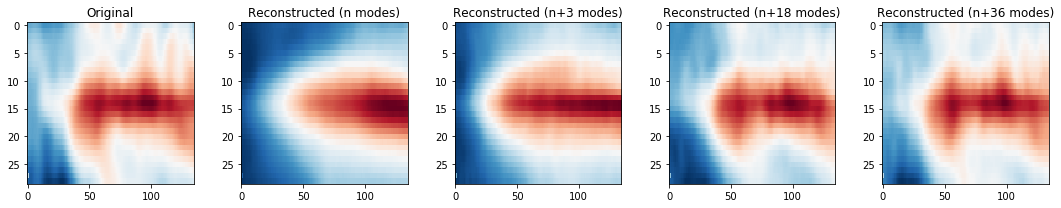

In [77]:
plt.figure(figsize=(15,3))
extras = [3,18,36]

month = 100
cmap = 'RdBu_r'
plt.subplot(1,len(extras)+2,1)
plt.imshow(np.reshape(pca_input_SST[month,:],(29,135)), cmap = cmap, aspect='auto')
plt.title('Original')

plt.subplot(1,len(extras)+2,2)
plt.imshow(np.reshape(data_SST_rec[month,:],(29,135)), cmap = cmap, aspect='auto')
plt.title('Reconstructed (n modes)')

# try a reconstruction with more modes
chart_id = 1
for plus in extras:
    pca_SST = PCA(n_components = n_modes_SST+plus)
    PCs_SST = pca_SST.fit_transform(pca_input_SST)
    eigvecs_SST = pca_SST.components_
    fracVar_SST = pca_SST.explained_variance_ratio_
    data_SST_rec_plus = np.empty_like(pca_input_SST)
    for kk in range(np.shape(pca_input_SST)[0]): # for each month
        this_SST_rec = np.zeros_like(pca_input_SST[0,:])
        for mode in range(n_modes_SST+plus):
            this_SST_rec += eigvecs_SST[mode,:]*PCs_SST[kk,mode]    
        data_SST_rec_plus[kk,:] = this_SST_rec
    plt.subplot(1,len(extras)+2,2+chart_id)
    plt.imshow(np.reshape(data_SST_rec_plus[month,:],(29,135)), cmap = cmap, aspect='auto')
    plt.title('Reconstructed (n+%d modes)' % plus)
    chart_id+=1

plt.tight_layout()
plt.show()

Now that we've processed the data a bit with PCA, we can use CCA on our two datasets:

* `data_SST_rec`: reconstructed (simplified) sea surface temperature data
* `data_T_rec`: reconstructed (simplified) temperature data

We want to find modes of correlation between the sea surface temperature and overall temperature.

In [78]:
xdata = data_SST_rec
ydata = data_T_rec

n_modes = 10 # modes to keep
cca = CCA(n_components=n_modes,max_iter = 10000)
U,V = cca.fit_transform(xdata,ydata)
A = cca.x_weights_
B = cca.y_weights_
F = np.cov(xdata.T)@A
G = np.cov(ydata.T)@B
r = [np.corrcoef(U[:,ii],V[:,ii]) for ii in range(n_modes)]

/Users/robertlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 2
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/robertlin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


In [79]:
# we want U, V to be normalized to have unity variance for easier visual comparison
normx = np.empty_like(U[0,:])
normy = np.empty_like(normx)

for ind in range(len(U[0,:])):
    
    normx[ind] = np.std(U[:,ind])
    normy[ind] = np.std(V[:,ind])
    
    U[:,ind]=U[:,ind]/normx[ind]
    V[:,ind]=V[:,ind]/normy[ind]

/Users/robertlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/robertlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Now plot first $n$ CCA modes of SST (F), T (G), and their loadings (u,v)

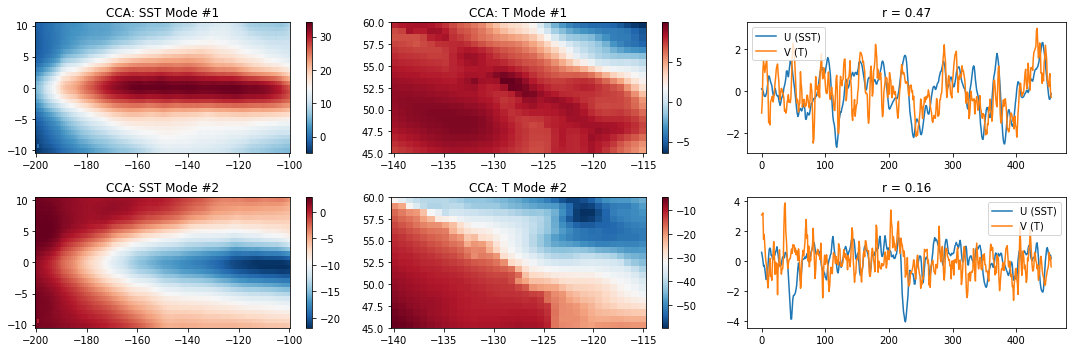

In [81]:
n = 2
cmap = 'RdBu_r'
plt.figure(figsize=(15,5))
for mode in range(n):
    plt.subplot(2,3,3*mode+1)
    plt.imshow(np.reshape(F[:,mode],(29,135)),cmap=cmap,extent=SST_extent,aspect='auto')
    plt.title('CCA: SST Mode #' + str(mode+1))
    plt.colorbar()

    plt.subplot(2,3,3*mode+2)
    plt.imshow(np.reshape(G[:,mode],(21,35)),cmap=cmap,extent=T_extent,aspect='auto')
    plt.title('CCA: T Mode #' + str(mode+1))
    plt.colorbar()

    plt.subplot(2,3,3*mode+3)
    plt.plot(U[:,mode])
    plt.plot(V[:,mode])
    plt.legend(['U (SST)','V (T)'])
    plt.title('r = ' + str(r[mode][0,1])[:4])

plt.tight_layout()
plt.show()